<a href="https://colab.research.google.com/github/UndeadZed/Hosting-Web-Apps-on-Colab/blob/main/samples/Django_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example for running Django in Colab

## Step 1: we install Django

In [1]:
!pip install django

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 19.1 MB/s eta 0:00:00


## Step 2: we make a simple Django Project

In [2]:
!django-admin startproject test_project

In [3]:
%cd test_project/test_project
!ls

/content/test_project/test_project
asgi.py  __init__.py  settings.py  urls.py  wsgi.py


## Step 3: updating the allowed hosts to avoid the following error :

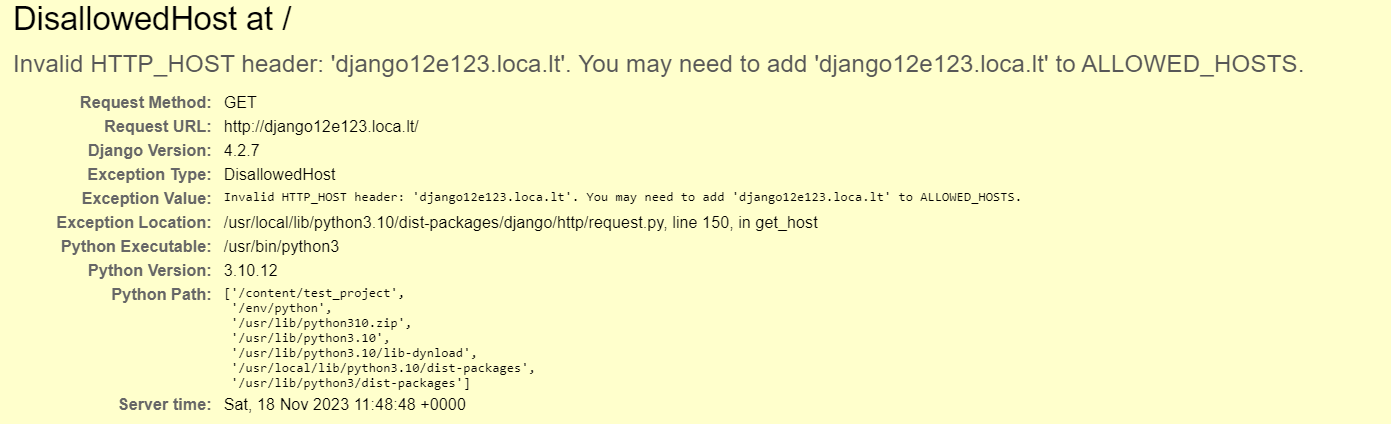

In [4]:
%%writefile settings.py
"""
Django settings for test_project project.

Generated by 'django-admin startproject' using Django 4.2.5.

For more information on this file, see
https://docs.djangoproject.com/en/4.2/topics/settings/

For the full list of settings and their values, see
https://docs.djangoproject.com/en/4.2/ref/settings/
"""

from pathlib import Path

# Build paths inside the project like this: BASE_DIR / 'subdir'.
BASE_DIR = Path(__file__).resolve().parent.parent


# Quick-start development settings - unsuitable for production
# See https://docs.djangoproject.com/en/4.2/howto/deployment/checklist/

# SECURITY WARNING: keep the secret key used in production secret!
SECRET_KEY = 'django-insecure-67e7mclhdzpp!q%)_bbk6+h$(#43d^21_d$l3%8&ut_&brk4cw'

# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = True

ALLOWED_HOSTS = ['*']


# Application definition

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
]

MIDDLEWARE = [
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.common.CommonMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
]

ROOT_URLCONF = 'test_project.urls'

TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [],
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]

WSGI_APPLICATION = 'test_project.wsgi.application'


# Database
# https://docs.djangoproject.com/en/4.2/ref/settings/#databases

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }
}


# Password validation
# https://docs.djangoproject.com/en/4.2/ref/settings/#auth-password-validators

AUTH_PASSWORD_VALIDATORS = [
    {
        'NAME': 'django.contrib.auth.password_validation.UserAttributeSimilarityValidator',
    },
    {
        'NAME': 'django.contrib.auth.password_validation.MinimumLengthValidator',
    },
    {
        'NAME': 'django.contrib.auth.password_validation.CommonPasswordValidator',
    },
    {
        'NAME': 'django.contrib.auth.password_validation.NumericPasswordValidator',
    },
]


# Internationalization
# https://docs.djangoproject.com/en/4.2/topics/i18n/

LANGUAGE_CODE = 'en-us'

TIME_ZONE = 'UTC'

USE_I18N = True

USE_TZ = True


# Static files (CSS, JavaScript, Images)
# https://docs.djangoproject.com/en/4.2/howto/static-files/

STATIC_URL = 'static/'

# Default primary key field type
# https://docs.djangoproject.com/en/4.2/ref/settings/#default-auto-field

DEFAULT_AUTO_FIELD = 'django.db.models.BigAutoField'


Overwriting settings.py


## Step 4: Use NodeJS to run the App

In [5]:
!npm install --global http-server
!npm install --global localtunnel
!npm install -g concurrently

/tools/node/bin/http-server -> /tools/node/lib/node_modules/http-server/bin/http-server
+ http-server@14.1.1
added 44 packages from 42 contributors in 5.518s
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.845s


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.2.4       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.2.4   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰────────────────────────────────────────────────────────────────╯

/tools/node/bin/concurrently -> /tools/node/lib/node_modules/concurrently/dist/bin/concurrently.js
/tools/node/bin/conc -> /tools/node/lib/node_modules/concurrently/dist/bin/concurrently.js
+ concurrently@8.

In [6]:
%cd ..
!ls

/content/test_project
manage.py  test_project


In [7]:
# Getting the Global IP of the notebook so we can access the app

!curl ipv4.icanhazip.com

35.247.66.196


In [8]:
!concurrently "python manage.py runserver 8501" "lt --port 8501 --subdomain django12e4123"

[1] your url is: https://django12e4123.loca.lt
[0] Watching for file changes with StatReloader
[0] [18/Nov/2023 11:58:52] "GET / HTTP/1.1" 200 10664
[0] Not Found: /favicon.ico
[0] [18/Nov/2023 11:58:53] "GET /favicon.ico HTTP/1.1" 404 2123
[0] Performing system checks...
[0] 
[0] System check identified no issues (0 silenced).
[0] 
[0] You have 18 unapplied migration(s). Your project may not work properly until you apply the migrations for app(s): admin, auth, contenttypes, sessions.
[0] Run 'python manage.py migrate' to apply them.
[0] November 18, 2023 - 11:58:38
[0] Django version 4.2.7, using settings 'test_project.settings'
[0] Starting development server at http://127.0.0.1:8501/
[0] Quit the server with CONTROL-C.
[0] 
[1] lt --port 8501 --subdomain django12e4123 exited with code SIGINT
[0] python manage.py runserver 8501 exited with code SIGINT


# Done now this should be what you see:
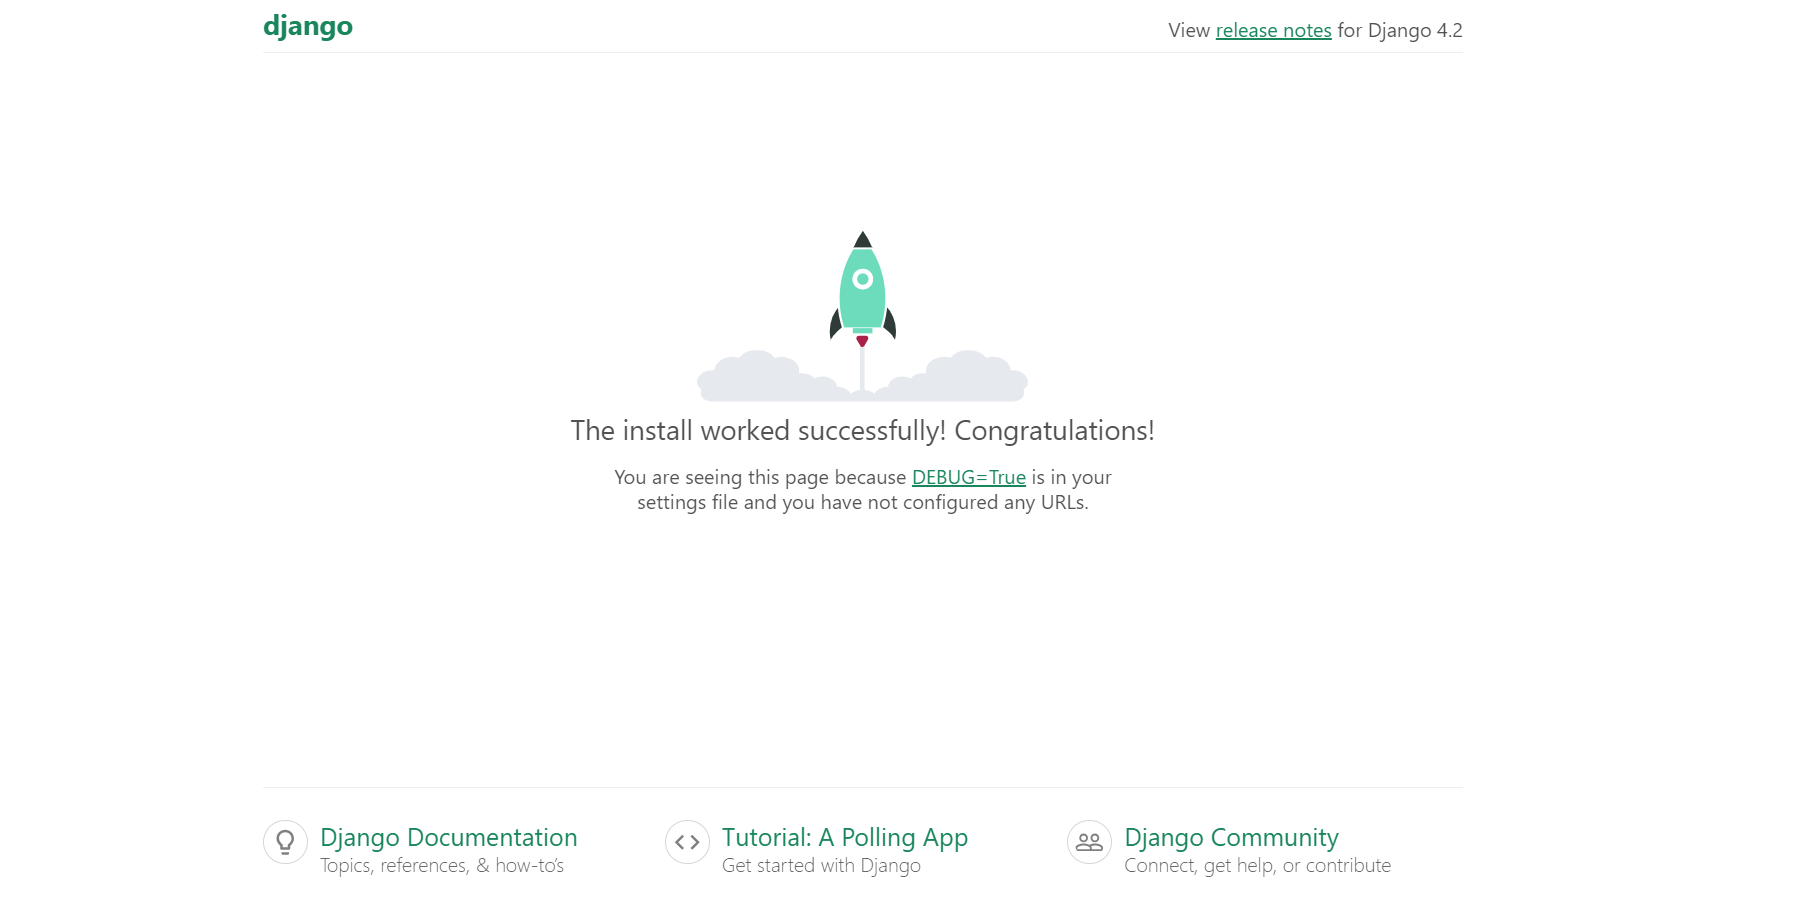